In [1]:
from IPython.core.display import HTML
HTML('<style> .container{ width:90%; } .widget-hprogress{ width:500px; }</style>')

In [2]:
'''import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install regex
!{sys.executable} -m pip install contractions
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install lightgbm
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install keras_metrics
!{sys.executable} -m pip install tqdm
!{sys.executable} -m pip install tables
!{sys.executable} -m pip install h5py'''

'import sys\n!{sys.executable} -m pip install numpy\n!{sys.executable} -m pip install pandas\n!{sys.executable} -m pip install regex\n!{sys.executable} -m pip install contractions\n!{sys.executable} -m pip install nltk\n!{sys.executable} -m pip install matplotlib\n!{sys.executable} -m pip install seaborn\n!{sys.executable} -m pip install sklearn\n!{sys.executable} -m pip install xgboost\n!{sys.executable} -m pip install lightgbm\n!{sys.executable} -m pip install tensorflow\n!{sys.executable} -m pip install keras\n!{sys.executable} -m pip install keras_metrics\n!{sys.executable} -m pip install tqdm\n!{sys.executable} -m pip install tables\n!{sys.executable} -m pip install h5py'

In [3]:
import regex
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tqdm.auto import tqdm

%matplotlib inline

In [4]:
train = pd.read_csv('data/imdb_reviews_train.txt', sep="\t")
train.text = train.text.str.strip()
train.text = train.text.str.lower()

In [5]:
train.head(10)

,text,review
0,story of a man who has unnatural feelings for ...,neg
1,airport '77 starts as a brand new luxury 747 p...,neg
2,this film lacked something i couldn't put my f...,neg
3,"sorry everyone,,, i know this is supposed to b...",neg
4,when i was little my parents took me along to ...,neg
5,it appears that many critics find the idea of ...,neg
6,the second attempt by a new york intellectual ...,neg
7,"i don't know who to blame, the timid writers o...",neg
8,this film is mediocre at best. angie harmon is...,neg
9,the film is bad. there is no other way to say ...,neg


In [6]:
train.iloc[9]['text']

'the film is bad. there is no other way to say it. the story is weak and outdated, especially for this country. i don\'t think most people know what a "walker" is or will really care. i felt as if i was watching a movie from the 70\'s. the subject was just not believable for the year 2007, even being set in dc. i think this rang true for everyone else who watched it too as the applause were low and quick at the end. most didn\'t stay for the q&a either.<br /><br />i don\'t think schrader really thought the film out ahead of time. many of the scenes seemed to be cut short as if they were never finished or he just didn\'t know how to finish them. he jumped from one scene to the next and you had to try and figure out or guess what was going on. i really didn\'t get woody\'s (carter) private life or boyfriend either. what were all the "artistic" male bondage and torture pictures (from iraq prisons) about? what was he thinking? i think it was his very poor attempt at trying to create this d

Replace contractions, e.g. "didn't" ==> "did not"

In [7]:
tqdm.pandas(desc="Fixing contractions")
import contractions_fixer
train.text = train.text.progress_apply(lambda x: contractions_fixer.fix(x))
train.iloc[9].text

'the film is bad. there is no other way to say it. the story is weak and outdated, especially for this country. i do not think most people know what a "walker" is or will really care. i felt as if i was watching a movie from the 70\'s. the subject was just not believable for the year 2007, even being set in dc. i think this rang true for everyone else who watched it too as the applause were low and quick at the end. most did not stay for the q&a either.<br /><br />i do not think schrader really thought the film out ahead of time. many of the scenes seemed to be cut short as if they were never finished or he just did not know how to finish them. he jumped from one scene to the next and you had to try and figure out or guess what was going on. i really did not get woody\'s (carter) private life or boyfriend either. what were all the "artistic" male bondage and torture pictures (from iraq prisons) about? what was he thinking? i think it was his very poor attempt at trying to create this d

Replace hyphens, forward slashes and HTML line breaks with spaces; replace ampersands with " and "

In [8]:
tqdm.pandas(desc="Removing line breaks")
pattern = regex.compile("(<br\s*/>)|(\-)|(\/)")
train.text = train.text.progress_apply(lambda x: pattern.sub(" ", x))

tqdm.pandas(desc="Removing ampersands")
pattern = regex.compile("&")
train.text = train.text.progress_apply(lambda x: pattern.sub(" and ", x))
train.iloc[9].text

'the film is bad. there is no other way to say it. the story is weak and outdated, especially for this country. i do not think most people know what a "walker" is or will really care. i felt as if i was watching a movie from the 70\'s. the subject was just not believable for the year 2007, even being set in dc. i think this rang true for everyone else who watched it too as the applause were low and quick at the end. most did not stay for the q and a either.  i do not think schrader really thought the film out ahead of time. many of the scenes seemed to be cut short as if they were never finished or he just did not know how to finish them. he jumped from one scene to the next and you had to try and figure out or guess what was going on. i really did not get woody\'s (carter) private life or boyfriend either. what were all the "artistic" male bondage and torture pictures (from iraq prisons) about? what was he thinking? i think it was his very poor attempt at trying to create this dark pr

Remove punctuation symbols

In [9]:
import string
tqdm.pandas(desc="Removing punctuation")
pattern = regex.compile('[{}]'.format(regex.escape(string.punctuation)))
train.text = train.text.progress_apply(lambda x: pattern.sub("", x))
train.iloc[9].text

'the film is bad there is no other way to say it the story is weak and outdated especially for this country i do not think most people know what a walker is or will really care i felt as if i was watching a movie from the 70s the subject was just not believable for the year 2007 even being set in dc i think this rang true for everyone else who watched it too as the applause were low and quick at the end most did not stay for the q and a either  i do not think schrader really thought the film out ahead of time many of the scenes seemed to be cut short as if they were never finished or he just did not know how to finish them he jumped from one scene to the next and you had to try and figure out or guess what was going on i really did not get woodys carter private life or boyfriend either what were all the artistic male bondage and torture pictures from iraq prisons about what was he thinking i think it was his very poor attempt at trying to create this dark private subculture life for wo

Regex to remove every instance of a full stop word from the text

In [10]:
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
#stop_words = set(stopwords.words('english'))
stop_words=['in','of','at','a','the']

tqdm.pandas(desc="Removing stop words")
pattern = regex.compile("\\b(" + "|".join(stop_words) + ")\\b")
train.text = train.text.progress_apply(lambda x: pattern.sub("", x))
train.iloc[9].text

[nltk_data] Downloading package stopwords to C:\Users\Jorge de
[nltk_data]     Bustos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


' film is bad there is no other way to say it  story is weak and outdated especially for this country i do not think most people know what  walker is or will really care i felt as if i was watching  movie from  70s  subject was just not believable for  year 2007 even being set  dc i think this rang true for everyone else who watched it too as  applause were low and quick   end most did not stay for  q and  either  i do not think schrader really thought  film out ahead  time many   scenes seemed to be cut short as if they were never finished or he just did not know how to finish them he jumped from one scene to  next and you had to try and figure out or guess what was going on i really did not get woodys carter private life or boyfriend either what were all  artistic male bondage and torture pictures from iraq prisons about what was he thinking i think it was his very poor attempt  trying to create this dark private subculture life for woodys character car it did not work it did not eve

In [11]:
train.to_hdf("data/train.hdf5", "train")

In [12]:
train = pd.read_hdf("data/train.hdf5", "train")

In [13]:
metrics_df = pd.DataFrame(columns=['stem/lemma', 'vectorizer', 'classifier', 'accuracy', 'precision', 'recall', 'f1', 'specificity'])
metrics_df = metrics_df.set_index(['stem/lemma', 'vectorizer', 'classifier'])

In [14]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, auc, \
    roc_auc_score, roc_curve, precision_recall_curve, recall_score, average_precision_score, precision_score
from sklearn.externals import joblib
from sklearn.exceptions import DataConversionWarning
from lightgbm.sklearn import LGBMClassifier

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

nltk.download('punkt')
nltk.download('wordnet')
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

[nltk_data] Downloading package punkt to C:\Users\Jorge de
[nltk_data]     Bustos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Jorge de
[nltk_data]     Bustos\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
# tokenize text and remove extra spaces
def tokenize_text(text):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return tokens

def stem_lemma_tokens(tokens, stem_lemma):
    stem_lemma = stem_lemma
    if hasattr(stem_lemma, "lemmatize"):
        tokens = [stem_lemma.lemmatize(token) for token in tokens]   
    if hasattr(stem_lemma, "stem"):
        tokens = [stem_lemma.stem(token) for token in tokens]    
    return tokens

def stem_lemma_text(text, stem_lemma):
    tokens = tokenize_text(text)
    tokens = stem_lemma_tokens(tokens, stem_lemma)
    text = " ".join(tokens)
    return text

def make_stem_lemmas():
    stem_lemmas = [
        ("WordNetLemmatizer", WordNetLemmatizer()),
        ("PorterStemmer", PorterStemmer()),
        ("LancasterStemmer", LancasterStemmer()),
        ("SnowballStemmer", SnowballStemmer("english")),
    ]
    return stem_lemmas

In [36]:
def plot_metrics(classifier, classifier_name, vectorizer_name, stem_lemma_name, X_train, X_val, y_train, y_val):
    prediction = classifier.predict(X_val.astype('float32'))
    accuracy = accuracy_score(y_val, prediction)
    f1 = f1_score(y_val, prediction, pos_label="pos")
    recall = recall_score(y_val, prediction, pos_label="pos")
    precision = precision_score(y_val, prediction, pos_label="pos")
    specificity = recall_score(y_val, prediction, pos_label="neg")
    print('Vectorizer: %s. Classifier: %s' % \
          (vectorizer_name, classifier_name))
    print('Accuracy: %0.3f. Precision: %0.3f. Recall: %0.3f. F1 Score: %0.3f. Specificity: %0.3f' % \
          (accuracy, precision, recall, f1, specificity))
    print(classification_report(y_val, prediction))
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_val, prediction), annot=True, fmt="d")
    metrics_df.loc[(stem_lemma_name, vectorizer_name, classifier_name), :] = [
        accuracy,
        precision,
        recall,
        f1,
        specificity,
    ]
    plt.show()

In [37]:
def classify_and_plot(classifier, classifier_name, vectorizer_name, stem_lemma_name, X_train, X_val, y_train, y_val):
    classifier.fit(X_train.astype('float32'), y_train)
    plot_metrics(classifier, classifier_name, vectorizer_name, stem_lemma_name, X_train, X_val, y_train, y_val)
    return classifier

In [38]:
def make_vectorizers():
    vectorizers = [
        #("CountVectorizer_Bin", CountVectorizer(binary=True)),
        #("CountVectorizer_NonBin", CountVectorizer(binary=False)),
        ("TfidfVectorizer", TfidfVectorizer()),
        ("CountVectorizer_Bin_ngram", CountVectorizer(binary=True, ngram_range=(1,2))),
        ("CountVectorizer_NonBin_ngram", CountVectorizer(binary=False, ngram_range=(1,2))),
        ("TfidfVectorizer_ngram", TfidfVectorizer(ngram_range=(1,2))),
    ]
    return vectorizers

In [39]:
def make_classifiers():
    classifiers = [
        ("LogisticRegression_0.5", LogisticRegression(solver='liblinear', C=0.5)),
        ("LogisticRegression_0.1", LogisticRegression(solver='liblinear', C=0.1)),
        #("LogisticRegression_0.05", LogisticRegression(solver='liblinear', C=0.05)),
        ("MultinomialNB", MultinomialNB()),
        #("RandomForestClassifier", RandomForestClassifier(n_estimators=100)),
        #("GradientBoostingClassifier", GradientBoostingClassifier(n_estimators=100)),
        #("AdaBoostClassifier", AdaBoostClassifier(n_estimators=100)),
        #("LGBMClassifier", LGBMClassifier()),
        #("LinearSVC_0.2", LinearSVC(C=0.2)),
        ("LinearSVC_0.5", LinearSVC(C=0.5)),
        ("LinearSVC_1", LinearSVC(C=1, max_iter=2000)),
        ("LinearSVC_1.5", LinearSVC(C=1.5, max_iter=2000)),
        ("LinearSVC_2", LinearSVC(C=2, max_iter=2000)),
    ]
    return classifiers

Vectorizer: TfidfVectorizer. Classifier: LogisticRegression_0.5
Accuracy: 0.878. Precision: 0.866. Recall: 0.892. F1 Score: 0.879. Specificity: 0.864
              precision    recall  f1-score   support

         neg       0.89      0.86      0.88      2515
         pos       0.87      0.89      0.88      2485

   micro avg       0.88      0.88      0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



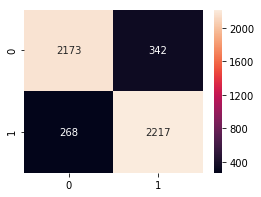

Vectorizer: TfidfVectorizer. Classifier: LogisticRegression_0.1
Accuracy: 0.843. Precision: 0.822. Recall: 0.872. F1 Score: 0.846. Specificity: 0.814
              precision    recall  f1-score   support

         neg       0.87      0.81      0.84      2515
         pos       0.82      0.87      0.85      2485

   micro avg       0.84      0.84      0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



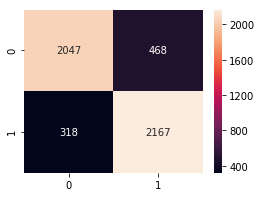

Vectorizer: TfidfVectorizer. Classifier: MultinomialNB
Accuracy: 0.856. Precision: 0.873. Recall: 0.832. F1 Score: 0.852. Specificity: 0.881
              precision    recall  f1-score   support

         neg       0.84      0.88      0.86      2515
         pos       0.87      0.83      0.85      2485

   micro avg       0.86      0.86      0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



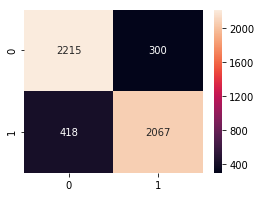

Vectorizer: TfidfVectorizer. Classifier: LinearSVC_0.5
Accuracy: 0.892. Precision: 0.885. Recall: 0.900. F1 Score: 0.892. Specificity: 0.885
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.89      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



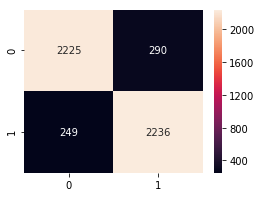

Vectorizer: TfidfVectorizer. Classifier: LinearSVC_1
Accuracy: 0.889. Precision: 0.882. Recall: 0.895. F1 Score: 0.889. Specificity: 0.882
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



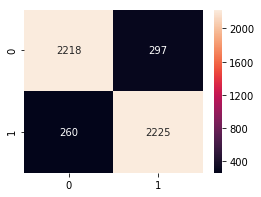

Vectorizer: TfidfVectorizer. Classifier: LinearSVC_1.5
Accuracy: 0.887. Precision: 0.882. Recall: 0.893. F1 Score: 0.887. Specificity: 0.882
              precision    recall  f1-score   support

         neg       0.89      0.88      0.89      2515
         pos       0.88      0.89      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



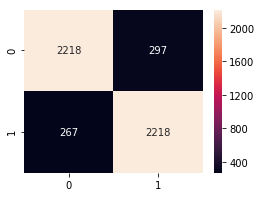

Vectorizer: TfidfVectorizer. Classifier: LinearSVC_2
Accuracy: 0.887. Precision: 0.880. Recall: 0.895. F1 Score: 0.887. Specificity: 0.879
              precision    recall  f1-score   support

         neg       0.89      0.88      0.89      2515
         pos       0.88      0.89      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



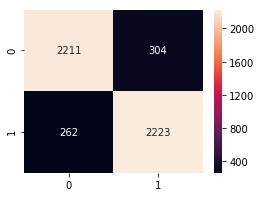

Vectorizer: CountVectorizer_Bin_ngram. Classifier: LogisticRegression_0.5
Accuracy: 0.895. Precision: 0.883. Recall: 0.909. F1 Score: 0.896. Specificity: 0.881
              precision    recall  f1-score   support

         neg       0.91      0.88      0.89      2515
         pos       0.88      0.91      0.90      2485

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



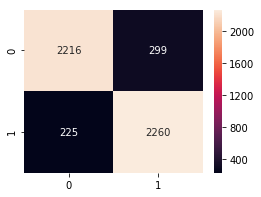

Vectorizer: CountVectorizer_Bin_ngram. Classifier: LogisticRegression_0.1
Accuracy: 0.891. Precision: 0.880. Recall: 0.905. F1 Score: 0.892. Specificity: 0.878
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



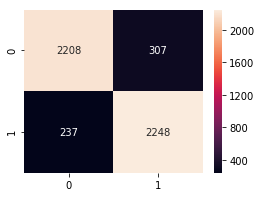

Vectorizer: CountVectorizer_Bin_ngram. Classifier: MultinomialNB
Accuracy: 0.880. Precision: 0.905. Recall: 0.848. F1 Score: 0.876. Specificity: 0.912
              precision    recall  f1-score   support

         neg       0.86      0.91      0.88      2515
         pos       0.90      0.85      0.88      2485

   micro avg       0.88      0.88      0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



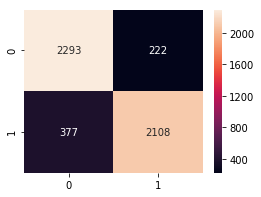

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_Bin_ngram. Classifier: LinearSVC_0.5
Accuracy: 0.893. Precision: 0.886. Recall: 0.900. F1 Score: 0.893. Specificity: 0.885
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      2515
         pos       0.89      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



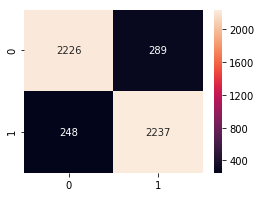

Vectorizer: CountVectorizer_Bin_ngram. Classifier: LinearSVC_1
Accuracy: 0.893. Precision: 0.886. Recall: 0.900. F1 Score: 0.893. Specificity: 0.885
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      2515
         pos       0.89      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



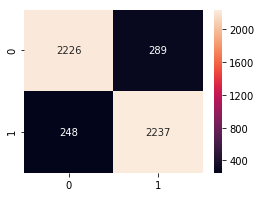

Vectorizer: CountVectorizer_Bin_ngram. Classifier: LinearSVC_1.5
Accuracy: 0.893. Precision: 0.886. Recall: 0.900. F1 Score: 0.893. Specificity: 0.885
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      2515
         pos       0.89      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



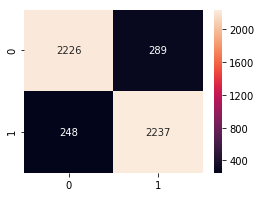

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_Bin_ngram. Classifier: LinearSVC_2
Accuracy: 0.892. Precision: 0.886. Recall: 0.900. F1 Score: 0.893. Specificity: 0.885
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      2515
         pos       0.89      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



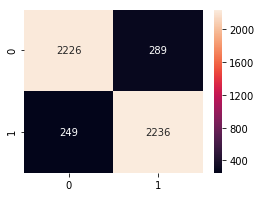

Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LogisticRegression_0.5
Accuracy: 0.893. Precision: 0.885. Recall: 0.903. F1 Score: 0.894. Specificity: 0.883
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



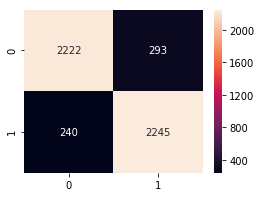

Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LogisticRegression_0.1
Accuracy: 0.892. Precision: 0.884. Recall: 0.901. F1 Score: 0.893. Specificity: 0.883
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



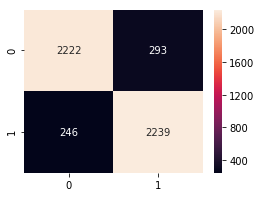

Vectorizer: CountVectorizer_NonBin_ngram. Classifier: MultinomialNB
Accuracy: 0.878. Precision: 0.901. Recall: 0.847. F1 Score: 0.873. Specificity: 0.908
              precision    recall  f1-score   support

         neg       0.86      0.91      0.88      2515
         pos       0.90      0.85      0.87      2485

   micro avg       0.88      0.88      0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



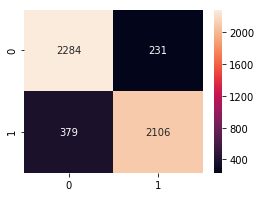

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LinearSVC_0.5
Accuracy: 0.888. Precision: 0.882. Recall: 0.894. F1 Score: 0.888. Specificity: 0.882
              precision    recall  f1-score   support

         neg       0.89      0.88      0.89      2515
         pos       0.88      0.89      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



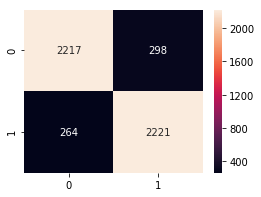

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LinearSVC_1
Accuracy: 0.888. Precision: 0.883. Recall: 0.893. F1 Score: 0.888. Specificity: 0.883
              precision    recall  f1-score   support

         neg       0.89      0.88      0.89      2515
         pos       0.88      0.89      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



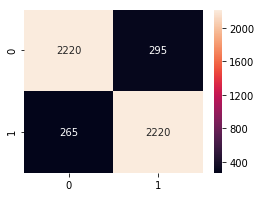

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LinearSVC_1.5
Accuracy: 0.888. Precision: 0.883. Recall: 0.894. F1 Score: 0.888. Specificity: 0.883
              precision    recall  f1-score   support

         neg       0.89      0.88      0.89      2515
         pos       0.88      0.89      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



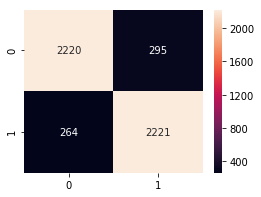

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LinearSVC_2
Accuracy: 0.888. Precision: 0.883. Recall: 0.894. F1 Score: 0.888. Specificity: 0.883
              precision    recall  f1-score   support

         neg       0.89      0.88      0.89      2515
         pos       0.88      0.89      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



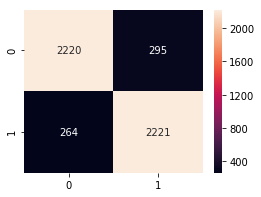

Vectorizer: TfidfVectorizer_ngram. Classifier: LogisticRegression_0.5
Accuracy: 0.868. Precision: 0.853. Recall: 0.887. F1 Score: 0.870. Specificity: 0.849
              precision    recall  f1-score   support

         neg       0.88      0.85      0.87      2515
         pos       0.85      0.89      0.87      2485

   micro avg       0.87      0.87      0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



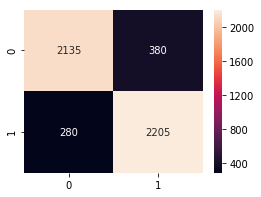

Vectorizer: TfidfVectorizer_ngram. Classifier: LogisticRegression_0.1
Accuracy: 0.830. Precision: 0.805. Recall: 0.868. F1 Score: 0.835. Specificity: 0.793
              precision    recall  f1-score   support

         neg       0.86      0.79      0.82      2515
         pos       0.81      0.87      0.84      2485

   micro avg       0.83      0.83      0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



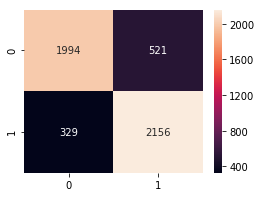

Vectorizer: TfidfVectorizer_ngram. Classifier: MultinomialNB
Accuracy: 0.879. Precision: 0.903. Recall: 0.847. F1 Score: 0.875. Specificity: 0.911
              precision    recall  f1-score   support

         neg       0.86      0.91      0.88      2515
         pos       0.90      0.85      0.87      2485

   micro avg       0.88      0.88      0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



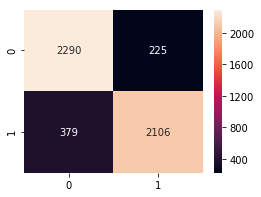

Vectorizer: TfidfVectorizer_ngram. Classifier: LinearSVC_0.5
Accuracy: 0.900. Precision: 0.890. Recall: 0.912. F1 Score: 0.901. Specificity: 0.889
              precision    recall  f1-score   support

         neg       0.91      0.89      0.90      2515
         pos       0.89      0.91      0.90      2485

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



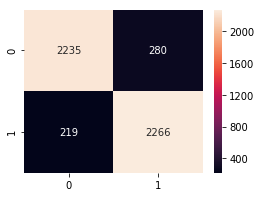

Vectorizer: TfidfVectorizer_ngram. Classifier: LinearSVC_1
Accuracy: 0.901. Precision: 0.893. Recall: 0.911. F1 Score: 0.902. Specificity: 0.892
              precision    recall  f1-score   support

         neg       0.91      0.89      0.90      2515
         pos       0.89      0.91      0.90      2485

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



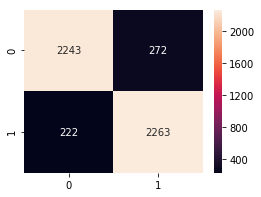

Vectorizer: TfidfVectorizer_ngram. Classifier: LinearSVC_1.5
Accuracy: 0.903. Precision: 0.896. Recall: 0.912. F1 Score: 0.904. Specificity: 0.895
              precision    recall  f1-score   support

         neg       0.91      0.90      0.90      2515
         pos       0.90      0.91      0.90      2485

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



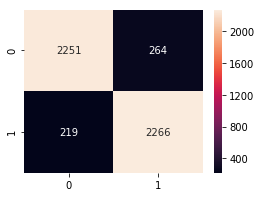

Vectorizer: TfidfVectorizer_ngram. Classifier: LinearSVC_2
Accuracy: 0.904. Precision: 0.896. Recall: 0.912. F1 Score: 0.904. Specificity: 0.896
              precision    recall  f1-score   support

         neg       0.91      0.90      0.90      2515
         pos       0.90      0.91      0.90      2485

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



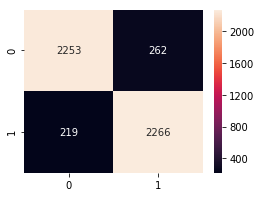

Vectorizer: TfidfVectorizer. Classifier: LogisticRegression_0.5
Accuracy: 0.877. Precision: 0.866. Recall: 0.890. F1 Score: 0.878. Specificity: 0.864
              precision    recall  f1-score   support

         neg       0.89      0.86      0.88      2515
         pos       0.87      0.89      0.88      2485

   micro avg       0.88      0.88      0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



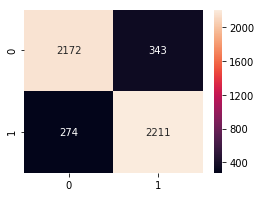

Vectorizer: TfidfVectorizer. Classifier: LogisticRegression_0.1
Accuracy: 0.849. Precision: 0.830. Recall: 0.876. F1 Score: 0.852. Specificity: 0.822
              precision    recall  f1-score   support

         neg       0.87      0.82      0.85      2515
         pos       0.83      0.88      0.85      2485

   micro avg       0.85      0.85      0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



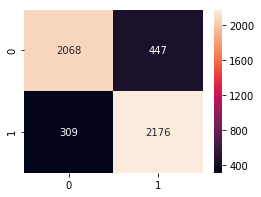

Vectorizer: TfidfVectorizer. Classifier: MultinomialNB
Accuracy: 0.852. Precision: 0.867. Recall: 0.829. F1 Score: 0.847. Specificity: 0.874
              precision    recall  f1-score   support

         neg       0.84      0.87      0.86      2515
         pos       0.87      0.83      0.85      2485

   micro avg       0.85      0.85      0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



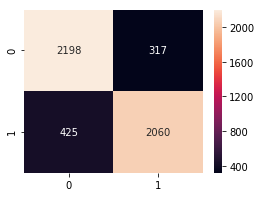

Vectorizer: TfidfVectorizer. Classifier: LinearSVC_0.5
Accuracy: 0.889. Precision: 0.878. Recall: 0.901. F1 Score: 0.889. Specificity: 0.876
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



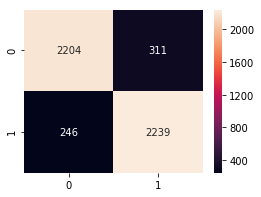

Vectorizer: TfidfVectorizer. Classifier: LinearSVC_1
Accuracy: 0.889. Precision: 0.880. Recall: 0.900. F1 Score: 0.890. Specificity: 0.879
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



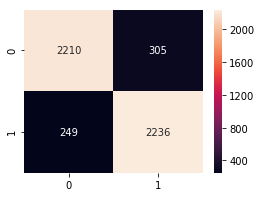

Vectorizer: TfidfVectorizer. Classifier: LinearSVC_1.5
Accuracy: 0.887. Precision: 0.880. Recall: 0.895. F1 Score: 0.888. Specificity: 0.880
              precision    recall  f1-score   support

         neg       0.89      0.88      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



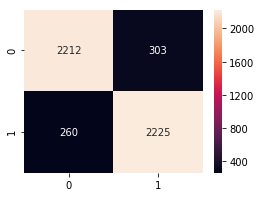

Vectorizer: TfidfVectorizer. Classifier: LinearSVC_2
Accuracy: 0.884. Precision: 0.878. Recall: 0.891. F1 Score: 0.885. Specificity: 0.878
              precision    recall  f1-score   support

         neg       0.89      0.88      0.88      2515
         pos       0.88      0.89      0.88      2485

   micro avg       0.88      0.88      0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



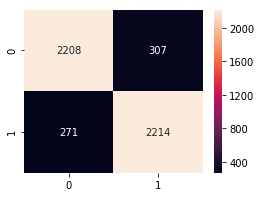

Vectorizer: CountVectorizer_Bin_ngram. Classifier: LogisticRegression_0.5
Accuracy: 0.898. Precision: 0.891. Recall: 0.907. F1 Score: 0.899. Specificity: 0.890
              precision    recall  f1-score   support

         neg       0.91      0.89      0.90      2515
         pos       0.89      0.91      0.90      2485

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



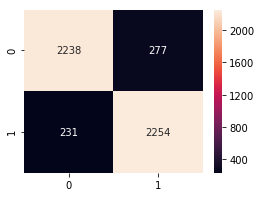

Vectorizer: CountVectorizer_Bin_ngram. Classifier: LogisticRegression_0.1
Accuracy: 0.895. Precision: 0.886. Recall: 0.904. F1 Score: 0.895. Specificity: 0.885
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      2515
         pos       0.89      0.90      0.90      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



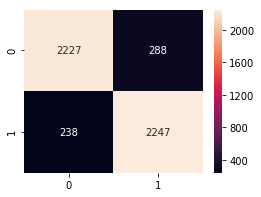

Vectorizer: CountVectorizer_Bin_ngram. Classifier: MultinomialNB
Accuracy: 0.880. Precision: 0.900. Recall: 0.853. F1 Score: 0.876. Specificity: 0.906
              precision    recall  f1-score   support

         neg       0.86      0.91      0.88      2515
         pos       0.90      0.85      0.88      2485

   micro avg       0.88      0.88      0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



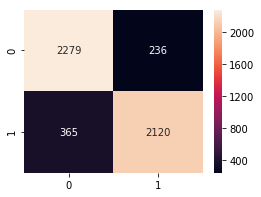

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_Bin_ngram. Classifier: LinearSVC_0.5
Accuracy: 0.894. Precision: 0.887. Recall: 0.902. F1 Score: 0.894. Specificity: 0.886
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      2515
         pos       0.89      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



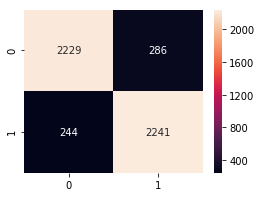

Vectorizer: CountVectorizer_Bin_ngram. Classifier: LinearSVC_1
Accuracy: 0.894. Precision: 0.886. Recall: 0.902. F1 Score: 0.894. Specificity: 0.885
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      2515
         pos       0.89      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



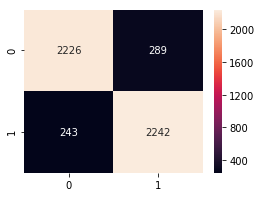

Vectorizer: CountVectorizer_Bin_ngram. Classifier: LinearSVC_1.5
Accuracy: 0.893. Precision: 0.886. Recall: 0.902. F1 Score: 0.894. Specificity: 0.885
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      2515
         pos       0.89      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



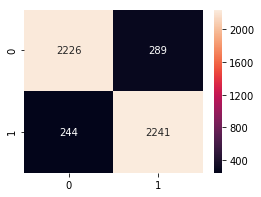

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_Bin_ngram. Classifier: LinearSVC_2
Accuracy: 0.894. Precision: 0.886. Recall: 0.902. F1 Score: 0.894. Specificity: 0.885
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      2515
         pos       0.89      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



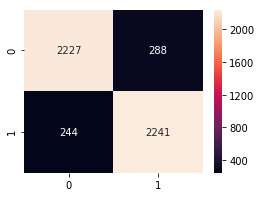

Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LogisticRegression_0.5
Accuracy: 0.893. Precision: 0.887. Recall: 0.899. F1 Score: 0.893. Specificity: 0.887
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      2515
         pos       0.89      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



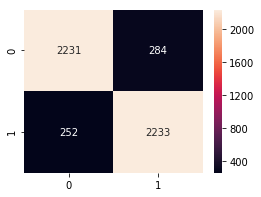

Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LogisticRegression_0.1
Accuracy: 0.891. Precision: 0.883. Recall: 0.899. F1 Score: 0.891. Specificity: 0.882
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



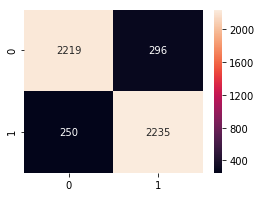

Vectorizer: CountVectorizer_NonBin_ngram. Classifier: MultinomialNB
Accuracy: 0.874. Precision: 0.893. Recall: 0.849. F1 Score: 0.870. Specificity: 0.900
              precision    recall  f1-score   support

         neg       0.86      0.90      0.88      2515
         pos       0.89      0.85      0.87      2485

   micro avg       0.87      0.87      0.87      5000
   macro avg       0.88      0.87      0.87      5000
weighted avg       0.88      0.87      0.87      5000



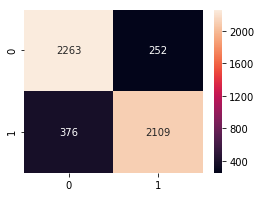

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LinearSVC_0.5
Accuracy: 0.891. Precision: 0.886. Recall: 0.895. F1 Score: 0.890. Specificity: 0.887
              precision    recall  f1-score   support

         neg       0.89      0.89      0.89      2515
         pos       0.89      0.89      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



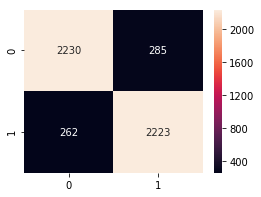

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LinearSVC_1
Accuracy: 0.890. Precision: 0.886. Recall: 0.894. F1 Score: 0.890. Specificity: 0.886
              precision    recall  f1-score   support

         neg       0.89      0.89      0.89      2515
         pos       0.89      0.89      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



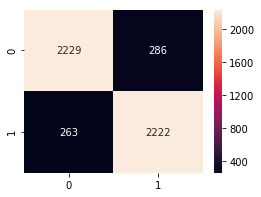

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LinearSVC_1.5
Accuracy: 0.890. Precision: 0.886. Recall: 0.894. F1 Score: 0.890. Specificity: 0.886
              precision    recall  f1-score   support

         neg       0.89      0.89      0.89      2515
         pos       0.89      0.89      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



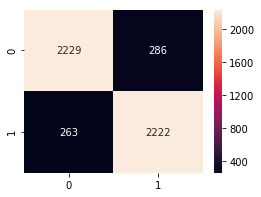

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LinearSVC_2
Accuracy: 0.890. Precision: 0.886. Recall: 0.894. F1 Score: 0.890. Specificity: 0.886
              precision    recall  f1-score   support

         neg       0.89      0.89      0.89      2515
         pos       0.89      0.89      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



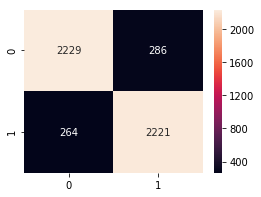

Vectorizer: TfidfVectorizer_ngram. Classifier: LogisticRegression_0.5
Accuracy: 0.870. Precision: 0.856. Recall: 0.887. F1 Score: 0.871. Specificity: 0.852
              precision    recall  f1-score   support

         neg       0.88      0.85      0.87      2515
         pos       0.86      0.89      0.87      2485

   micro avg       0.87      0.87      0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



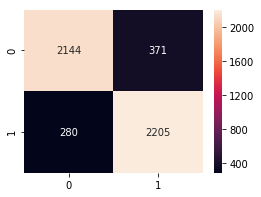

Vectorizer: TfidfVectorizer_ngram. Classifier: LogisticRegression_0.1
Accuracy: 0.833. Precision: 0.811. Recall: 0.864. F1 Score: 0.837. Specificity: 0.802
              precision    recall  f1-score   support

         neg       0.86      0.80      0.83      2515
         pos       0.81      0.86      0.84      2485

   micro avg       0.83      0.83      0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



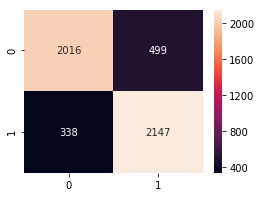

Vectorizer: TfidfVectorizer_ngram. Classifier: MultinomialNB
Accuracy: 0.879. Precision: 0.900. Recall: 0.852. F1 Score: 0.875. Specificity: 0.906
              precision    recall  f1-score   support

         neg       0.86      0.91      0.88      2515
         pos       0.90      0.85      0.88      2485

   micro avg       0.88      0.88      0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



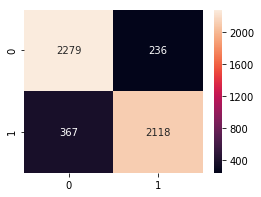

Vectorizer: TfidfVectorizer_ngram. Classifier: LinearSVC_0.5
Accuracy: 0.899. Precision: 0.890. Recall: 0.909. F1 Score: 0.900. Specificity: 0.889
              precision    recall  f1-score   support

         neg       0.91      0.89      0.90      2515
         pos       0.89      0.91      0.90      2485

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



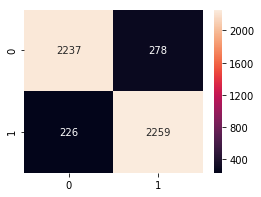

Vectorizer: TfidfVectorizer_ngram. Classifier: LinearSVC_1
Accuracy: 0.902. Precision: 0.892. Recall: 0.912. F1 Score: 0.902. Specificity: 0.891
              precision    recall  f1-score   support

         neg       0.91      0.89      0.90      2515
         pos       0.89      0.91      0.90      2485

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



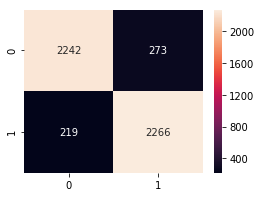

Vectorizer: TfidfVectorizer_ngram. Classifier: LinearSVC_1.5
Accuracy: 0.901. Precision: 0.893. Recall: 0.911. F1 Score: 0.902. Specificity: 0.892
              precision    recall  f1-score   support

         neg       0.91      0.89      0.90      2515
         pos       0.89      0.91      0.90      2485

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



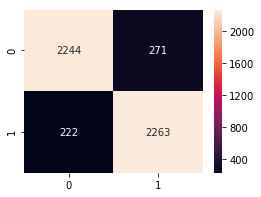

Vectorizer: TfidfVectorizer_ngram. Classifier: LinearSVC_2
Accuracy: 0.903. Precision: 0.896. Recall: 0.911. F1 Score: 0.903. Specificity: 0.895
              precision    recall  f1-score   support

         neg       0.91      0.90      0.90      2515
         pos       0.90      0.91      0.90      2485

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



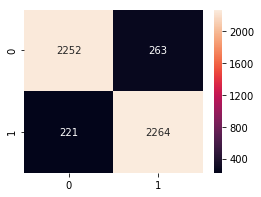

Vectorizer: TfidfVectorizer. Classifier: LogisticRegression_0.5
Accuracy: 0.877. Precision: 0.863. Recall: 0.895. F1 Score: 0.878. Specificity: 0.859
              precision    recall  f1-score   support

         neg       0.89      0.86      0.88      2515
         pos       0.86      0.89      0.88      2485

   micro avg       0.88      0.88      0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



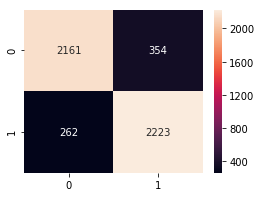

Vectorizer: TfidfVectorizer. Classifier: LogisticRegression_0.1
Accuracy: 0.848. Precision: 0.829. Recall: 0.875. F1 Score: 0.852. Specificity: 0.822
              precision    recall  f1-score   support

         neg       0.87      0.82      0.85      2515
         pos       0.83      0.88      0.85      2485

   micro avg       0.85      0.85      0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



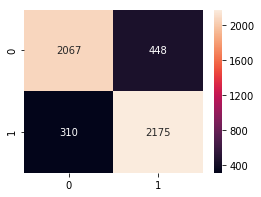

Vectorizer: TfidfVectorizer. Classifier: MultinomialNB
Accuracy: 0.850. Precision: 0.868. Recall: 0.824. F1 Score: 0.846. Specificity: 0.877
              precision    recall  f1-score   support

         neg       0.83      0.88      0.85      2515
         pos       0.87      0.82      0.85      2485

   micro avg       0.85      0.85      0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



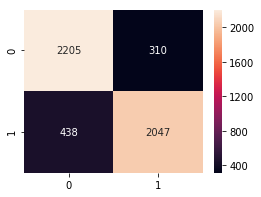

Vectorizer: TfidfVectorizer. Classifier: LinearSVC_0.5
Accuracy: 0.886. Precision: 0.876. Recall: 0.898. F1 Score: 0.887. Specificity: 0.874
              precision    recall  f1-score   support

         neg       0.90      0.87      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



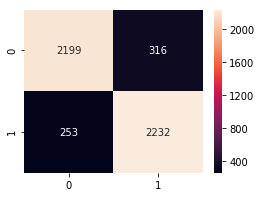

Vectorizer: TfidfVectorizer. Classifier: LinearSVC_1
Accuracy: 0.885. Precision: 0.879. Recall: 0.892. F1 Score: 0.886. Specificity: 0.879
              precision    recall  f1-score   support

         neg       0.89      0.88      0.89      2515
         pos       0.88      0.89      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



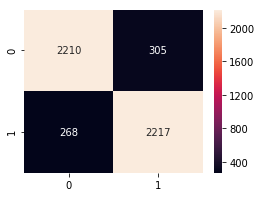

Vectorizer: TfidfVectorizer. Classifier: LinearSVC_1.5
Accuracy: 0.883. Precision: 0.877. Recall: 0.889. F1 Score: 0.883. Specificity: 0.876
              precision    recall  f1-score   support

         neg       0.89      0.88      0.88      2515
         pos       0.88      0.89      0.88      2485

   micro avg       0.88      0.88      0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



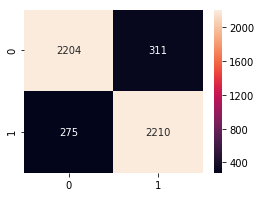

Vectorizer: TfidfVectorizer. Classifier: LinearSVC_2
Accuracy: 0.879. Precision: 0.875. Recall: 0.884. F1 Score: 0.879. Specificity: 0.875
              precision    recall  f1-score   support

         neg       0.88      0.87      0.88      2515
         pos       0.87      0.88      0.88      2485

   micro avg       0.88      0.88      0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



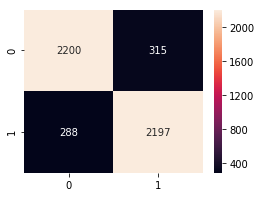

Vectorizer: CountVectorizer_Bin_ngram. Classifier: LogisticRegression_0.5
Accuracy: 0.892. Precision: 0.884. Recall: 0.901. F1 Score: 0.893. Specificity: 0.883
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



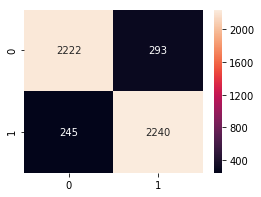

Vectorizer: CountVectorizer_Bin_ngram. Classifier: LogisticRegression_0.1
Accuracy: 0.892. Precision: 0.884. Recall: 0.900. F1 Score: 0.892. Specificity: 0.883
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



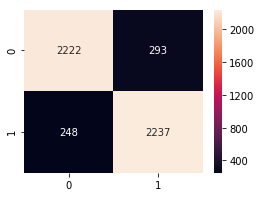

Vectorizer: CountVectorizer_Bin_ngram. Classifier: MultinomialNB
Accuracy: 0.877. Precision: 0.895. Recall: 0.852. F1 Score: 0.873. Specificity: 0.902
              precision    recall  f1-score   support

         neg       0.86      0.90      0.88      2515
         pos       0.90      0.85      0.87      2485

   micro avg       0.88      0.88      0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



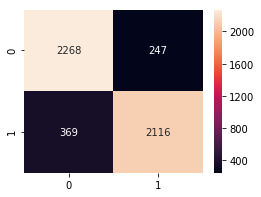

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_Bin_ngram. Classifier: LinearSVC_0.5
Accuracy: 0.889. Precision: 0.881. Recall: 0.897. F1 Score: 0.889. Specificity: 0.880
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



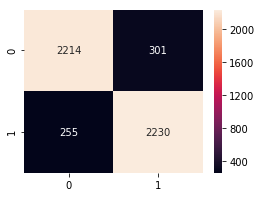

Vectorizer: CountVectorizer_Bin_ngram. Classifier: LinearSVC_1
Accuracy: 0.889. Precision: 0.881. Recall: 0.897. F1 Score: 0.889. Specificity: 0.880
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



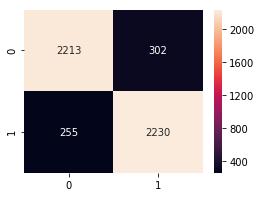

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_Bin_ngram. Classifier: LinearSVC_1.5
Accuracy: 0.889. Precision: 0.881. Recall: 0.897. F1 Score: 0.889. Specificity: 0.880
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



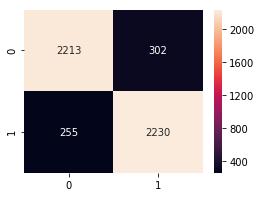

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_Bin_ngram. Classifier: LinearSVC_2
Accuracy: 0.889. Precision: 0.881. Recall: 0.897. F1 Score: 0.889. Specificity: 0.880
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



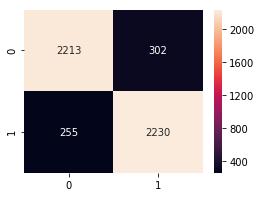

Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LogisticRegression_0.5
Accuracy: 0.893. Precision: 0.885. Recall: 0.901. F1 Score: 0.893. Specificity: 0.885
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.89      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



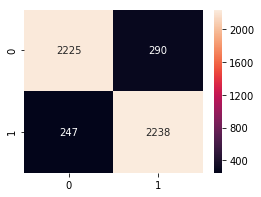

Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LogisticRegression_0.1
Accuracy: 0.893. Precision: 0.886. Recall: 0.901. F1 Score: 0.893. Specificity: 0.885
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      2515
         pos       0.89      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



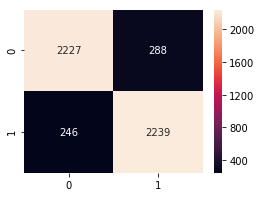

Vectorizer: CountVectorizer_NonBin_ngram. Classifier: MultinomialNB
Accuracy: 0.874. Precision: 0.891. Recall: 0.851. F1 Score: 0.870. Specificity: 0.897
              precision    recall  f1-score   support

         neg       0.86      0.90      0.88      2515
         pos       0.89      0.85      0.87      2485

   micro avg       0.87      0.87      0.87      5000
   macro avg       0.88      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



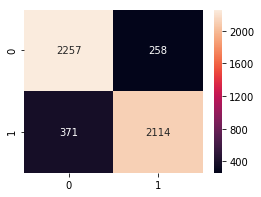

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LinearSVC_0.5
Accuracy: 0.889. Precision: 0.881. Recall: 0.897. F1 Score: 0.889. Specificity: 0.881
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



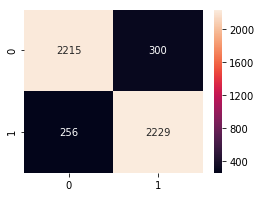

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LinearSVC_1
Accuracy: 0.888. Precision: 0.881. Recall: 0.897. F1 Score: 0.889. Specificity: 0.880
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



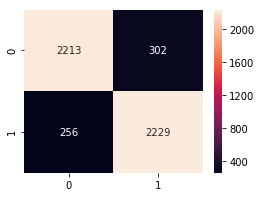

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LinearSVC_1.5
Accuracy: 0.889. Precision: 0.881. Recall: 0.897. F1 Score: 0.889. Specificity: 0.880
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



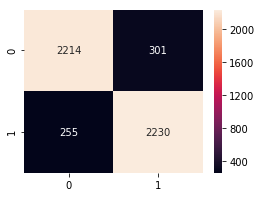

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LinearSVC_2
Accuracy: 0.889. Precision: 0.881. Recall: 0.897. F1 Score: 0.889. Specificity: 0.881
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



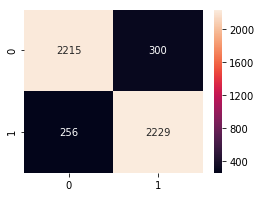

Vectorizer: TfidfVectorizer_ngram. Classifier: LogisticRegression_0.5
Accuracy: 0.873. Precision: 0.861. Recall: 0.887. F1 Score: 0.874. Specificity: 0.858
              precision    recall  f1-score   support

         neg       0.89      0.86      0.87      2515
         pos       0.86      0.89      0.87      2485

   micro avg       0.87      0.87      0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



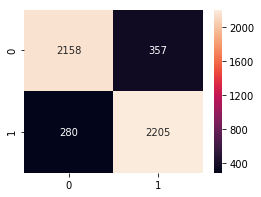

Vectorizer: TfidfVectorizer_ngram. Classifier: LogisticRegression_0.1
Accuracy: 0.833. Precision: 0.812. Recall: 0.866. F1 Score: 0.838. Specificity: 0.802
              precision    recall  f1-score   support

         neg       0.86      0.80      0.83      2515
         pos       0.81      0.87      0.84      2485

   micro avg       0.83      0.83      0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



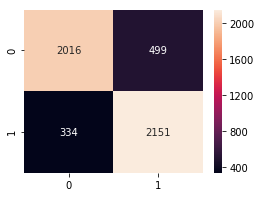

Vectorizer: TfidfVectorizer_ngram. Classifier: MultinomialNB
Accuracy: 0.880. Precision: 0.901. Recall: 0.851. F1 Score: 0.875. Specificity: 0.908
              precision    recall  f1-score   support

         neg       0.86      0.91      0.88      2515
         pos       0.90      0.85      0.88      2485

   micro avg       0.88      0.88      0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



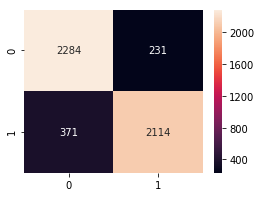

Vectorizer: TfidfVectorizer_ngram. Classifier: LinearSVC_0.5
Accuracy: 0.899. Precision: 0.890. Recall: 0.908. F1 Score: 0.899. Specificity: 0.889
              precision    recall  f1-score   support

         neg       0.91      0.89      0.90      2515
         pos       0.89      0.91      0.90      2485

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



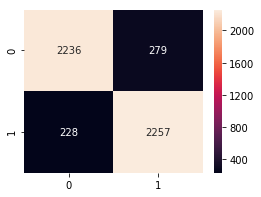

Vectorizer: TfidfVectorizer_ngram. Classifier: LinearSVC_1
Accuracy: 0.899. Precision: 0.890. Recall: 0.908. F1 Score: 0.899. Specificity: 0.889
              precision    recall  f1-score   support

         neg       0.91      0.89      0.90      2515
         pos       0.89      0.91      0.90      2485

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



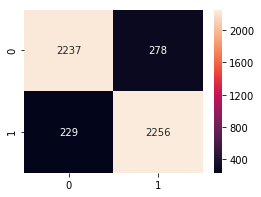

Vectorizer: TfidfVectorizer_ngram. Classifier: LinearSVC_1.5
Accuracy: 0.900. Precision: 0.891. Recall: 0.909. F1 Score: 0.900. Specificity: 0.891
              precision    recall  f1-score   support

         neg       0.91      0.89      0.90      2515
         pos       0.89      0.91      0.90      2485

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



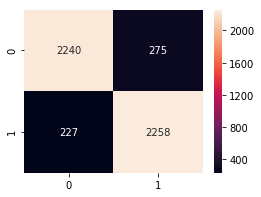

Vectorizer: TfidfVectorizer_ngram. Classifier: LinearSVC_2
Accuracy: 0.899. Precision: 0.890. Recall: 0.909. F1 Score: 0.900. Specificity: 0.889
              precision    recall  f1-score   support

         neg       0.91      0.89      0.90      2515
         pos       0.89      0.91      0.90      2485

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



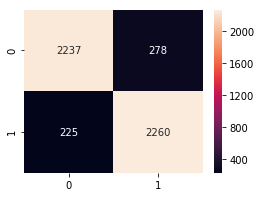

Vectorizer: TfidfVectorizer. Classifier: LogisticRegression_0.5
Accuracy: 0.878. Precision: 0.867. Recall: 0.890. F1 Score: 0.878. Specificity: 0.865
              precision    recall  f1-score   support

         neg       0.89      0.87      0.88      2515
         pos       0.87      0.89      0.88      2485

   micro avg       0.88      0.88      0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



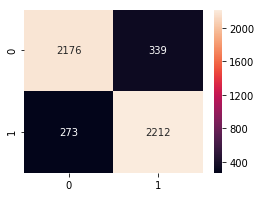

Vectorizer: TfidfVectorizer. Classifier: LogisticRegression_0.1
Accuracy: 0.848. Precision: 0.828. Recall: 0.876. F1 Score: 0.851. Specificity: 0.820
              precision    recall  f1-score   support

         neg       0.87      0.82      0.84      2515
         pos       0.83      0.88      0.85      2485

   micro avg       0.85      0.85      0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



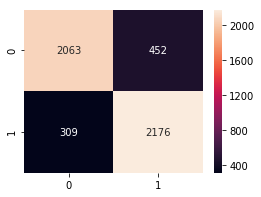

Vectorizer: TfidfVectorizer. Classifier: MultinomialNB
Accuracy: 0.852. Precision: 0.867. Recall: 0.829. F1 Score: 0.848. Specificity: 0.874
              precision    recall  f1-score   support

         neg       0.84      0.87      0.86      2515
         pos       0.87      0.83      0.85      2485

   micro avg       0.85      0.85      0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



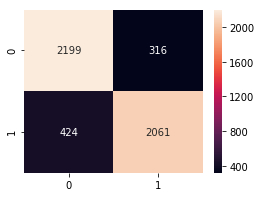

Vectorizer: TfidfVectorizer. Classifier: LinearSVC_0.5
Accuracy: 0.889. Precision: 0.877. Recall: 0.902. F1 Score: 0.890. Specificity: 0.876
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



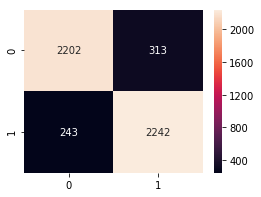

Vectorizer: TfidfVectorizer. Classifier: LinearSVC_1
Accuracy: 0.889. Precision: 0.879. Recall: 0.900. F1 Score: 0.889. Specificity: 0.877
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      2515
         pos       0.88      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



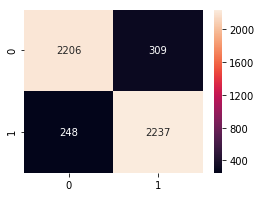

Vectorizer: TfidfVectorizer. Classifier: LinearSVC_1.5
Accuracy: 0.887. Precision: 0.879. Recall: 0.895. F1 Score: 0.887. Specificity: 0.879
              precision    recall  f1-score   support

         neg       0.89      0.88      0.89      2515
         pos       0.88      0.89      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



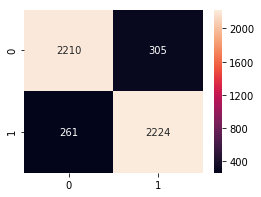

Vectorizer: TfidfVectorizer. Classifier: LinearSVC_2
Accuracy: 0.885. Precision: 0.879. Recall: 0.891. F1 Score: 0.885. Specificity: 0.879
              precision    recall  f1-score   support

         neg       0.89      0.88      0.89      2515
         pos       0.88      0.89      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



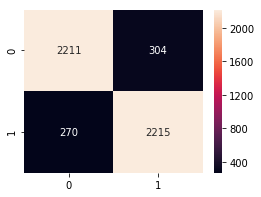

Vectorizer: CountVectorizer_Bin_ngram. Classifier: LogisticRegression_0.5
Accuracy: 0.899. Precision: 0.891. Recall: 0.908. F1 Score: 0.899. Specificity: 0.890
              precision    recall  f1-score   support

         neg       0.91      0.89      0.90      2515
         pos       0.89      0.91      0.90      2485

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



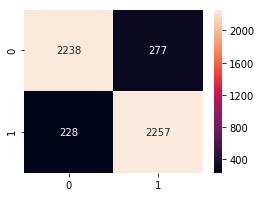

Vectorizer: CountVectorizer_Bin_ngram. Classifier: LogisticRegression_0.1
Accuracy: 0.897. Precision: 0.890. Recall: 0.904. F1 Score: 0.897. Specificity: 0.890
              precision    recall  f1-score   support

         neg       0.90      0.89      0.90      2515
         pos       0.89      0.90      0.90      2485

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



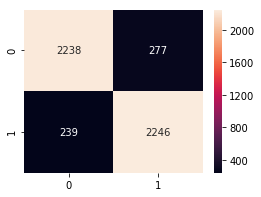

Vectorizer: CountVectorizer_Bin_ngram. Classifier: MultinomialNB
Accuracy: 0.879. Precision: 0.901. Recall: 0.851. F1 Score: 0.875. Specificity: 0.907
              precision    recall  f1-score   support

         neg       0.86      0.91      0.88      2515
         pos       0.90      0.85      0.88      2485

   micro avg       0.88      0.88      0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



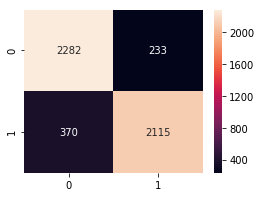

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_Bin_ngram. Classifier: LinearSVC_0.5
Accuracy: 0.894. Precision: 0.888. Recall: 0.900. F1 Score: 0.894. Specificity: 0.887
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      2515
         pos       0.89      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



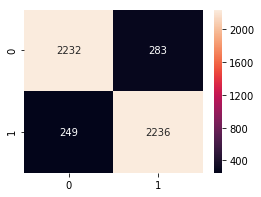

Vectorizer: CountVectorizer_Bin_ngram. Classifier: LinearSVC_1
Accuracy: 0.893. Precision: 0.888. Recall: 0.899. F1 Score: 0.893. Specificity: 0.888
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      2515
         pos       0.89      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



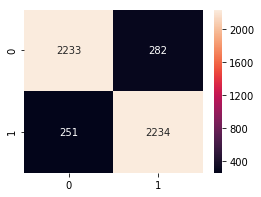

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_Bin_ngram. Classifier: LinearSVC_1.5
Accuracy: 0.894. Precision: 0.888. Recall: 0.899. F1 Score: 0.894. Specificity: 0.888
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      2515
         pos       0.89      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



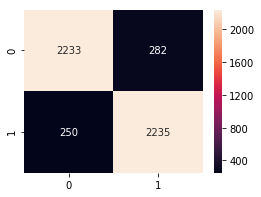

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_Bin_ngram. Classifier: LinearSVC_2
Accuracy: 0.894. Precision: 0.888. Recall: 0.899. F1 Score: 0.894. Specificity: 0.888
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      2515
         pos       0.89      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



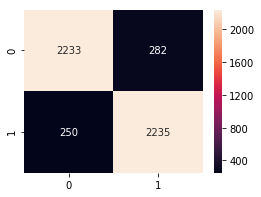

Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LogisticRegression_0.5
Accuracy: 0.895. Precision: 0.889. Recall: 0.902. F1 Score: 0.895. Specificity: 0.888
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      2515
         pos       0.89      0.90      0.90      2485

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.90      0.90      0.89      5000
weighted avg       0.90      0.90      0.89      5000



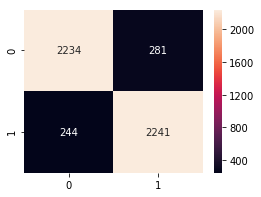

Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LogisticRegression_0.1
Accuracy: 0.893. Precision: 0.887. Recall: 0.899. F1 Score: 0.893. Specificity: 0.887
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      2515
         pos       0.89      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



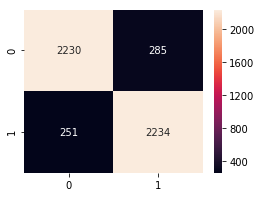

Vectorizer: CountVectorizer_NonBin_ngram. Classifier: MultinomialNB
Accuracy: 0.875. Precision: 0.895. Recall: 0.849. F1 Score: 0.871. Specificity: 0.901
              precision    recall  f1-score   support

         neg       0.86      0.90      0.88      2515
         pos       0.89      0.85      0.87      2485

   micro avg       0.88      0.88      0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



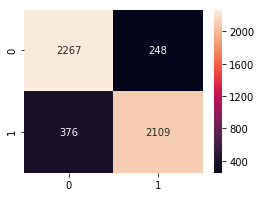

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LinearSVC_0.5
Accuracy: 0.891. Precision: 0.887. Recall: 0.895. F1 Score: 0.891. Specificity: 0.888
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      2515
         pos       0.89      0.89      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



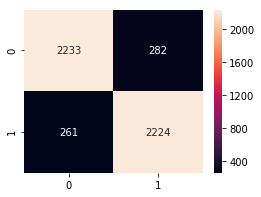

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LinearSVC_1
Accuracy: 0.891. Precision: 0.887. Recall: 0.895. F1 Score: 0.891. Specificity: 0.887
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      2515
         pos       0.89      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



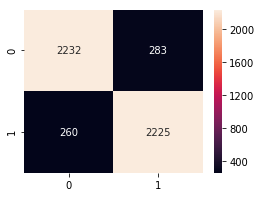

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LinearSVC_1.5
Accuracy: 0.891. Precision: 0.887. Recall: 0.895. F1 Score: 0.891. Specificity: 0.887
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      2515
         pos       0.89      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



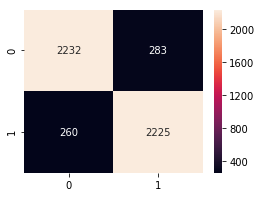

c:\portableapps\winpython\python-3.7.0.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: CountVectorizer_NonBin_ngram. Classifier: LinearSVC_2
Accuracy: 0.891. Precision: 0.887. Recall: 0.895. F1 Score: 0.891. Specificity: 0.887
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89      2515
         pos       0.89      0.90      0.89      2485

   micro avg       0.89      0.89      0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



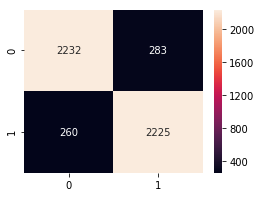

Vectorizer: TfidfVectorizer_ngram. Classifier: LogisticRegression_0.5
Accuracy: 0.872. Precision: 0.859. Recall: 0.890. F1 Score: 0.874. Specificity: 0.855
              precision    recall  f1-score   support

         neg       0.89      0.86      0.87      2515
         pos       0.86      0.89      0.87      2485

   micro avg       0.87      0.87      0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



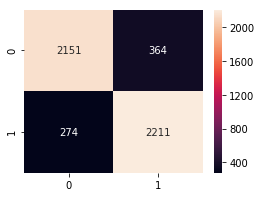

Vectorizer: TfidfVectorizer_ngram. Classifier: LogisticRegression_0.1
Accuracy: 0.836. Precision: 0.815. Recall: 0.867. F1 Score: 0.840. Specificity: 0.806
              precision    recall  f1-score   support

         neg       0.86      0.81      0.83      2515
         pos       0.81      0.87      0.84      2485

   micro avg       0.84      0.84      0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



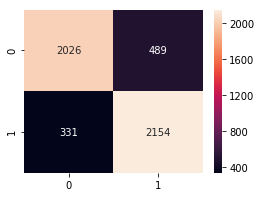

Vectorizer: TfidfVectorizer_ngram. Classifier: MultinomialNB
Accuracy: 0.881. Precision: 0.901. Recall: 0.854. F1 Score: 0.877. Specificity: 0.907
              precision    recall  f1-score   support

         neg       0.86      0.91      0.88      2515
         pos       0.90      0.85      0.88      2485

   micro avg       0.88      0.88      0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



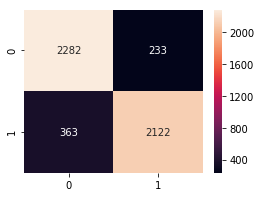

Vectorizer: TfidfVectorizer_ngram. Classifier: LinearSVC_0.5
Accuracy: 0.898. Precision: 0.890. Recall: 0.908. F1 Score: 0.899. Specificity: 0.889
              precision    recall  f1-score   support

         neg       0.91      0.89      0.90      2515
         pos       0.89      0.91      0.90      2485

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



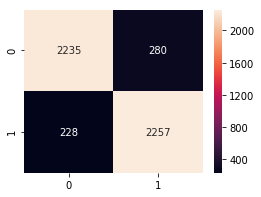

Vectorizer: TfidfVectorizer_ngram. Classifier: LinearSVC_1
Accuracy: 0.902. Precision: 0.893. Recall: 0.911. F1 Score: 0.902. Specificity: 0.892
              precision    recall  f1-score   support

         neg       0.91      0.89      0.90      2515
         pos       0.89      0.91      0.90      2485

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



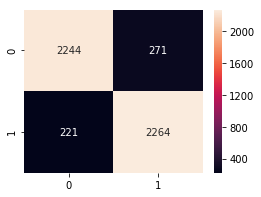

Vectorizer: TfidfVectorizer_ngram. Classifier: LinearSVC_1.5
Accuracy: 0.902. Precision: 0.894. Recall: 0.910. F1 Score: 0.902. Specificity: 0.894
              precision    recall  f1-score   support

         neg       0.91      0.89      0.90      2515
         pos       0.89      0.91      0.90      2485

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



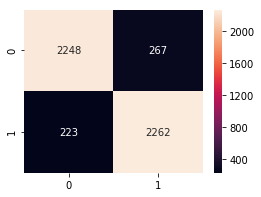

Vectorizer: TfidfVectorizer_ngram. Classifier: LinearSVC_2
Accuracy: 0.902. Precision: 0.894. Recall: 0.911. F1 Score: 0.902. Specificity: 0.894
              precision    recall  f1-score   support

         neg       0.91      0.89      0.90      2515
         pos       0.89      0.91      0.90      2485

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



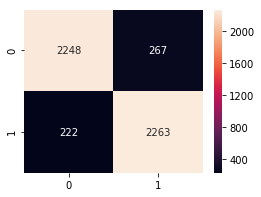

In [40]:
progress = tqdm(total=len(make_stem_lemmas()) * len(make_vectorizers()) * len(make_classifiers()))

for stlm in make_stem_lemmas():
    stem_lemma = stlm[1]
    stem_lemma_name = stlm[0]

    train = pd.read_hdf("data/train.hdf5", "train")
    tqdm.pandas(desc="Stemming/Lemmatizing")
    train.text = train.text.progress_apply(lambda x: stem_lemma_text(x, stem_lemma))
    train.iloc[9].text
    
    for vect in make_vectorizers():
        vectorizer = vect[1]
        vectorizer_name = vect[0]

        X = vectorizer.fit_transform(train.text)
        y = train.review
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

        for clas in make_classifiers():
            classifier = clas[1]
            classifier_name = clas[0]
            progress.set_description("{} - {}".format(vectorizer_name, classifier_name))
            classify_and_plot(classifier, classifier_name, vectorizer_name, stem_lemma_name, X_train, X_val, y_train, y_val)
            progress.update(1)

In [41]:
'''metrics_df \
    .sort_values(['accuracy', 'precision', 'recall'], ascending=False).style \
    .format('{:.3f}') \
    .set_properties(**{'min-width': '6em'}) \
    .background_gradient(cmap="coolwarm")'''

# Having to write this custom background colouring routine because Pandas and Matplotlib can't 
#  apply background colours to multiindex DataFrames for some reason (see code above)

from matplotlib import colors
def my_background_gradient(s, cmap='coolwarm'):
    def relative_luminance(rgba):
        r, g, b = (x / 12.92 if x <= 0.03928 else ((x + 0.055) / 1.055 ** 2.4) for x in rgba[:3])
        return 0.2126 * r + 0.7152 * g + 0.0722 * b
    
    def font_color(bg_color):
        rgba = list(colors.hex2color(bg_color))
        return '#f1f1f1' if relative_luminance(rgba) < 0.408 else '#000000'
    
    m = s.min().min()
    M = s.max().max()
    norm = colors.Normalize(m, M)
    normed = s.apply(norm)
    cm = plt.cm.get_cmap(cmap)
    c = normed.apply(lambda x: colors.rgb2hex(cm(x)))
    ret = c.apply(lambda x: 'background-color:%s;color:%s' % (x, font_color(x)))
    return ret

metrics_df \
    .sort_values(['accuracy', 'precision', 'recall'], ascending=False).style \
        .format('{:.3f}') \
        .set_properties(**{'min-width': '6em'}) \
        .apply(my_background_gradient, cmap="coolwarm", axis=0)